In [1]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [3]:
import rasterio
from rasterio.fill import fillnodata
import rasterio.plot
import matplotlib
from matplotlib import pyplot
import numpy as np


In [9]:
dem_path = "/content/drive/My Drive/Image Segmentation/"

# Inputs/Sources
low_res_dem_path = dem_path + 'low_res_dem.tif'
# high_res_dem_path = dem_path + 'low_res_dem.tif'

#Outputs/Destinationss
# low_res_dem_filled = dem_path + "low_res_dem_filled.tif"
low_res_dem_filled_smoothed = dem_path + "low_res_dem_filled_smoothed.tif"
# high_dem_filled = dem_path + "high_dem_filled.tif"
# high_dem_filled_smoothed = dem_path + "high_dem_filled_smoothed.tif"

In [10]:
def get_neighbors(array, row, col, no_data_val):
  xsteps=[0, -1, 1]
  xsteps= np.add(xsteps, row)
  ysteps=[0, -1, 1]
  ysteps=np.add(ysteps, col)
  neighbors =[]
  neighbors = [array[row][col] for row in xsteps if row in range(array.shape[0]) for col in ysteps if col in range(array.shape[1]) and not array[row][col] == no_data_val]
  # print("here")
  return neighbors

In [14]:
def interpolate(src_file, dest_file, no_data_val, max_search_distance = 100, smoothing = 0):
  src_array = []
  dest_array = []
  with rasterio.open(src_file) as src:
    dest_profile = src.profile
    src_array = src.read(1)
    no_data_src_array = []
    no_data_src_array = src_array[src_array==no_data_val]
    dest_array = fillnodata(src_array, mask=src.read_masks(1), max_search_distance=1, smoothing_iterations=smoothing)
    no_data_dest_array = []
    no_data_dest_array = dest_array[dest_array==no_data_val]
    print("Still to fill = "+str(len(no_data_dest_array))+"\n")
    print("filled with this interpolation = "+str(len(no_data_src_array)-len(no_data_dest_array)))
  with rasterio.open(dest_file, 'w', **dest_profile) as dest:
    dest.write_band(1, dest_array)
  return dest_array

In [15]:

def fill_completely (input_file, dest_file, smoothing_iterations = 0):
    with rasterio.open(input_file) as input:
      no_data_val = input.nodatavals[0]
      profile = input.profile
      input_array = input.read(1)
      dest_array = input_array
    #Create a copy as first output
    with rasterio.open(dest_file, 'w', **profile) as dest:
      dest.write_band(1, dest_array)
    i=0
    while no_data_val in dest_array:
      print("\niteration = "+str(i)+"\n")
      dest_array = interpolate(src_file=dest_file,
                               dest_file=dest_file,
                               no_data_val=no_data_val,
                               max_search_distance=1,
                               smoothing=smoothing_iterations)
      i+=1
  

In [16]:
fill_completely(low_res_dem_path, low_res_dem_filled_smoothed, 1)


iteration = 0

Still to fill = 52448

filled with this interpolation = 1743

iteration = 1

Still to fill = 50728

filled with this interpolation = 1720

iteration = 2

Still to fill = 49038

filled with this interpolation = 1690

iteration = 3

Still to fill = 47389

filled with this interpolation = 1649

iteration = 4

Still to fill = 45776

filled with this interpolation = 1613

iteration = 5

Still to fill = 44201

filled with this interpolation = 1575

iteration = 6

Still to fill = 42655

filled with this interpolation = 1546

iteration = 7

Still to fill = 41141

filled with this interpolation = 1514

iteration = 8

Still to fill = 39661

filled with this interpolation = 1480

iteration = 9

Still to fill = 38214

filled with this interpolation = 1447

iteration = 10

Still to fill = 36804

filled with this interpolation = 1410

iteration = 11

Still to fill = 35426

filled with this interpolation = 1378

iteration = 12

Still to fill = 34079

filled with this interpolation = 1

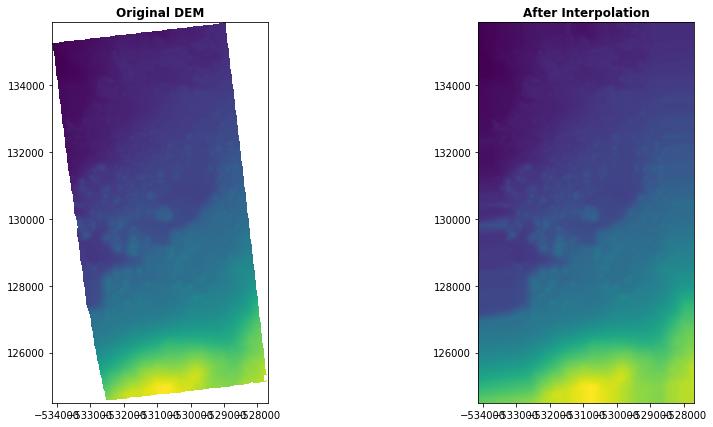

In [17]:
fig, (ax_original, ax_filled) = pyplot.subplots(1,2, figsize=(14,7))

with rasterio.open(low_res_dem_path) as dem:
  rasterio.plot.show(dem, ax=ax_original, title='Original DEM')

with rasterio.open(low_res_dem_filled_smoothed) as filled:
  rasterio.plot.show(filled, ax=ax_filled, title='After Interpolation')

# fig.savefig(dem_path+"Interpolation_3.png")